# K-means

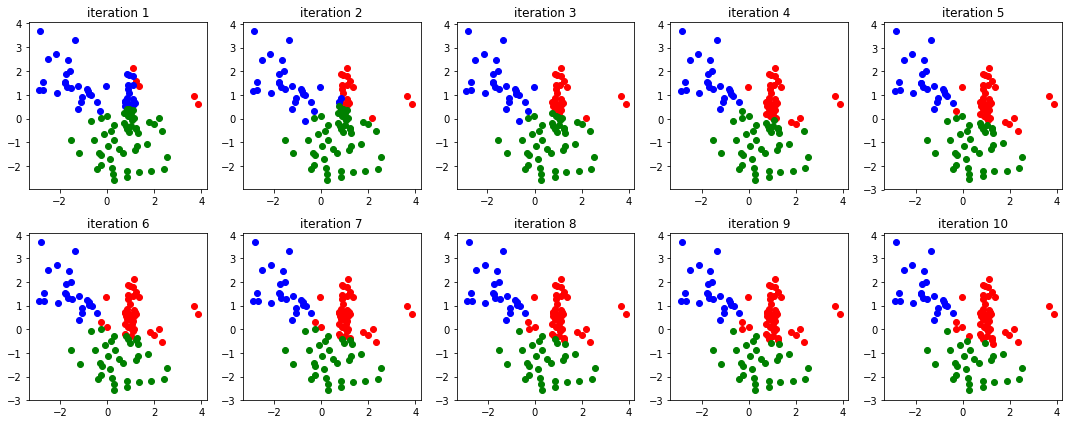

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.datasets import make_classification

%matplotlib inline

n_cluster = 3
color = ('red', 'blue', 'green')
n_iteration = 10

np.random.seed(0)

X, _ = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3, random_state=0)

d = X.shape[1]

mu = np.random.normal(size=d * n_cluster).reshape(d, n_cluster)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
ax = ax.flatten()

for i in range(n_iteration):    
    cluster = cdist(X, mu.T, 'sqeuclidean').argmin(axis=1)
    
    for j in range(n_cluster):
        mu[:, j] = X[cluster == j].mean(axis=0).T
    
        ax[i].scatter(X[cluster == j, 0], X[cluster == j, 1], color=color[j])
    ax[i].set_title('iteration {}'.format(i+1))
            
fig.tight_layout()

# K-medoids

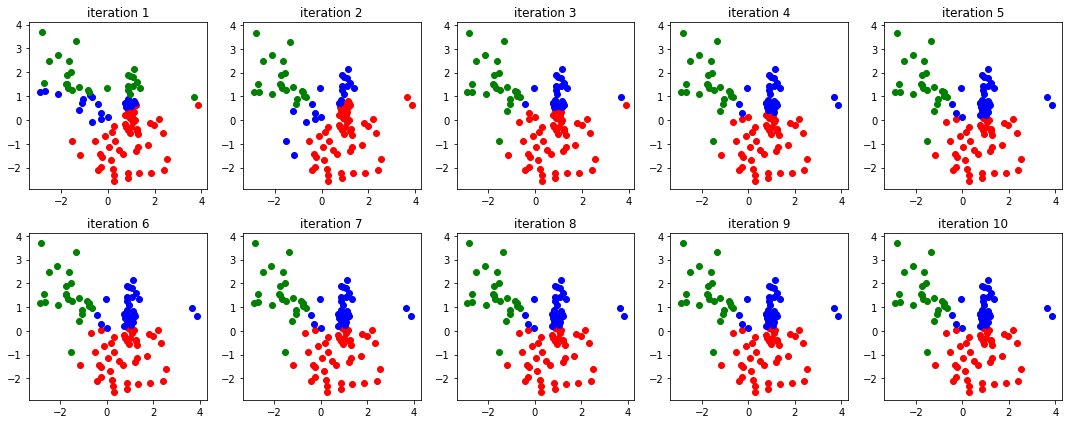

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.datasets import make_classification

%matplotlib inline

n_cluster = 3
color = ('red', 'blue', 'green')
n_iteration = 10

np.random.seed(0)

X, _ = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3, random_state=0)

N, d = X.shape

medoids = np.random.choice(np.arange(N), size=n_cluster, replace=False)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
ax = ax.flatten()

for i in range(n_iteration):    
    
    cluster = cdist(X, X[medoids, :], 'euclidean').argmin(axis=1)
    
    for j in range(n_cluster):
        dist_matrix = cdist(X[cluster == j], X[cluster == j], 'euclidean')
        np.fill_diagonal(dist_matrix, 0)
        ind_in_cluster = dist_matrix.sum(axis=0).argmin()
        ind = np.repeat(-1, repeats=N)
        ind[cluster == j] = range(sum(cluster == j))
        medoids[j] = np.where(ind == ind_in_cluster)[0][0]
    
        ax[i].scatter(X[cluster == j, 0], X[cluster == j, 1], color=color[j])
    ax[i].set_title('iteration {}'.format(i+1))
            
fig.tight_layout()